# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
AQI = pd.read_csv("E:\Downlload\Air Quality Index Prediction.csv")

In [3]:
AQI

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2181,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
2182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2183,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667
2184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [4]:
aq=AQI.iloc[1::2]
aq

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
1,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
3,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
5,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
7,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
9,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
2177,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
2179,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
2181,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
2183,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [5]:
aq=aq.reset_index(drop=True)
aq

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833
...,...,...,...,...,...,...,...,...,...
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667


In [6]:
aq.isna().sum().sum()

1

In [7]:
aq.isna().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [8]:
aq['PM 2.5'][aq['PM 2.5'].isna()]

184   NaN
Name: PM 2.5, dtype: float64

In [9]:
aq['PM 2.5'].mode()

0    0.0
dtype: float64

In [10]:
aq.iloc[184:185,8:9] = aq.iloc[184:185,8:9].fillna('0')

In [11]:
aq.isna().sum().sum()

0

# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E45BA5E4C8>,
      dtype=object)

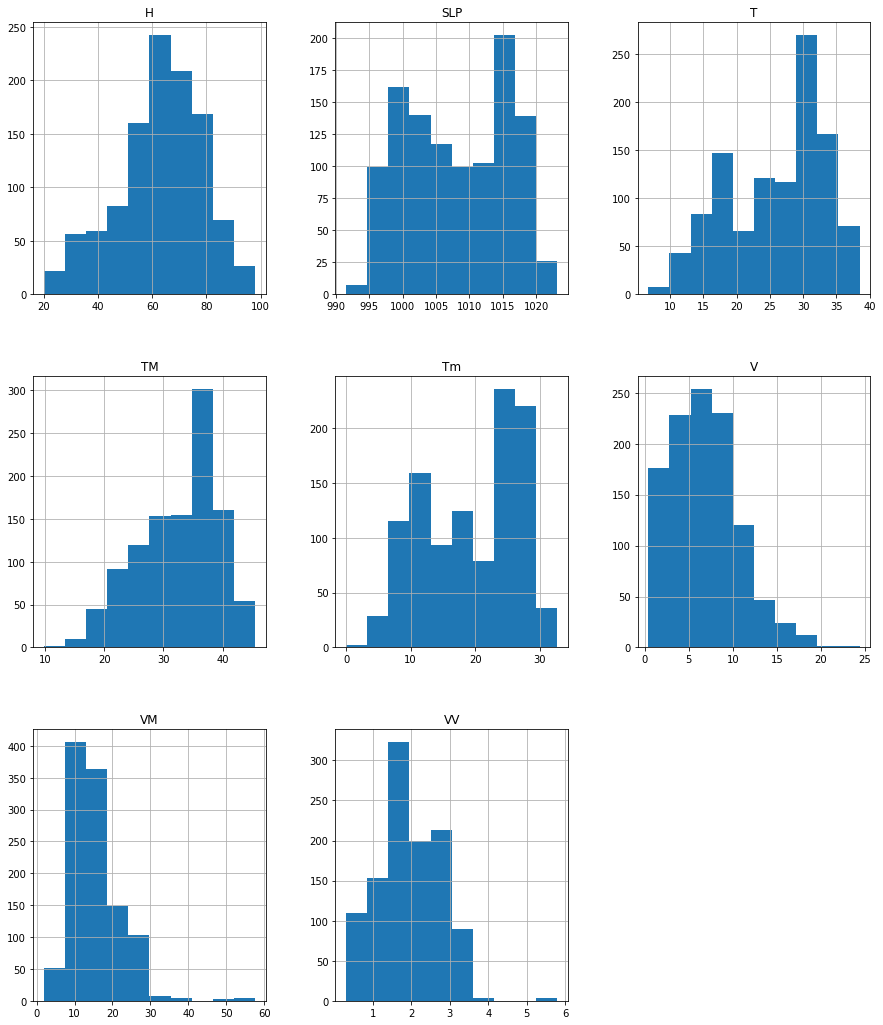

In [13]:
plt.rcParams["figure.figsize"] = 15,18
aq.hist()

Text(0.5, 1.0, 'Sea Level Pressure Distribution')

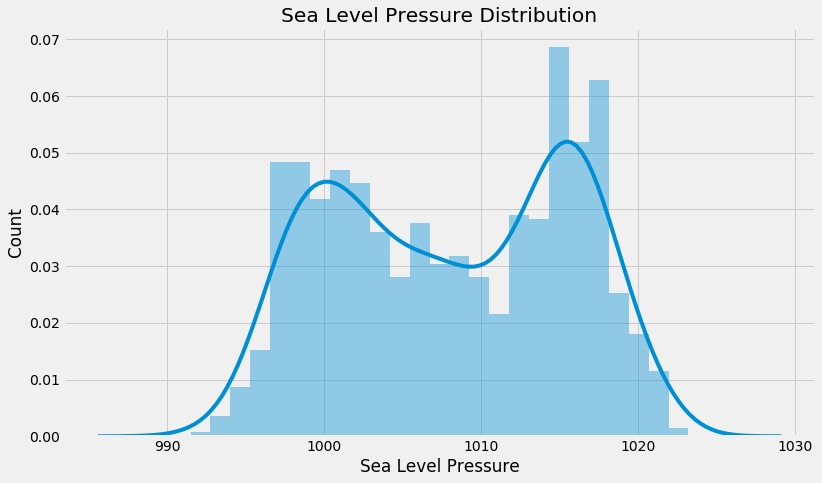

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(aq.SLP, bins = 25)
plt.xlabel('Sea Level Pressure')
plt.ylabel('Count')
plt.title('Sea Level Pressure Distribution')

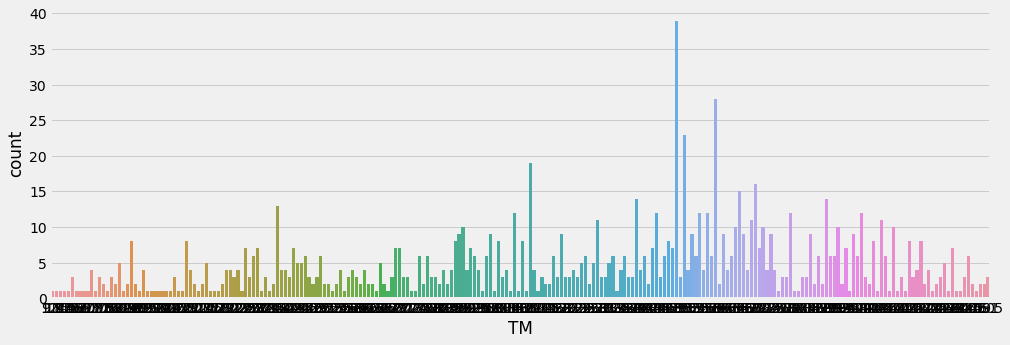

In [15]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(aq.TM,ax=ax)

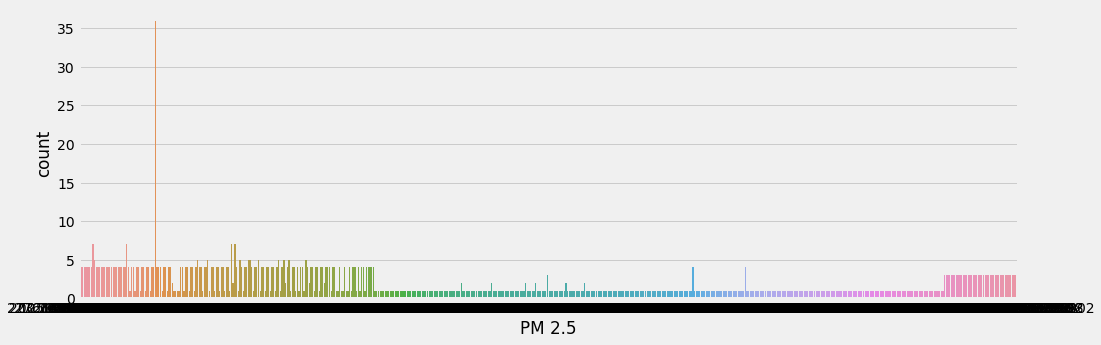

In [16]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(aq['PM 2.5'],ax=ax)

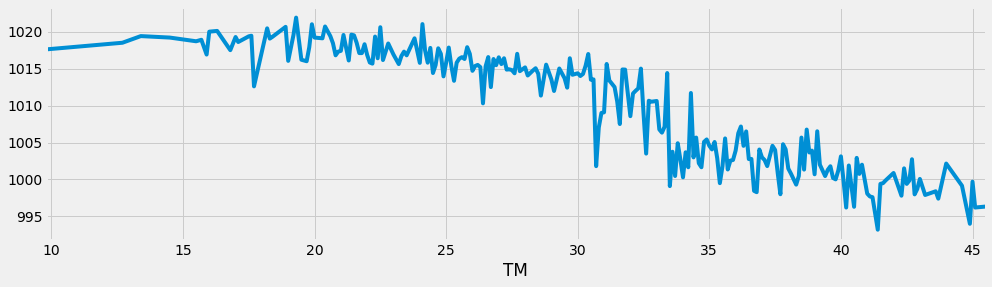

In [17]:
aq.groupby('TM').SLP.mean().plot(kind='line',figsize=(15,4))

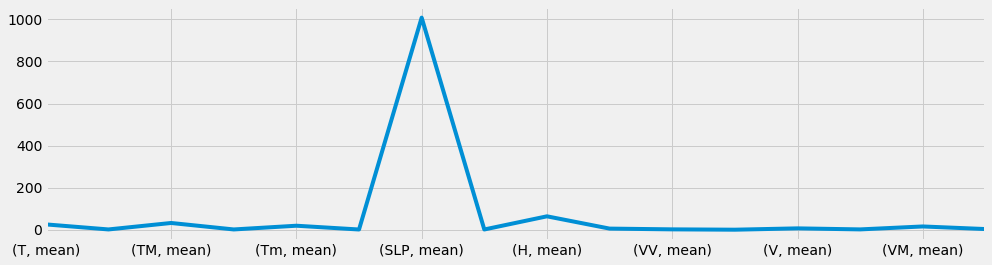

In [18]:
aq.groupby('PM 2.5').agg(['mean', 'std']).mean().plot(kind='line',figsize=(15,4))

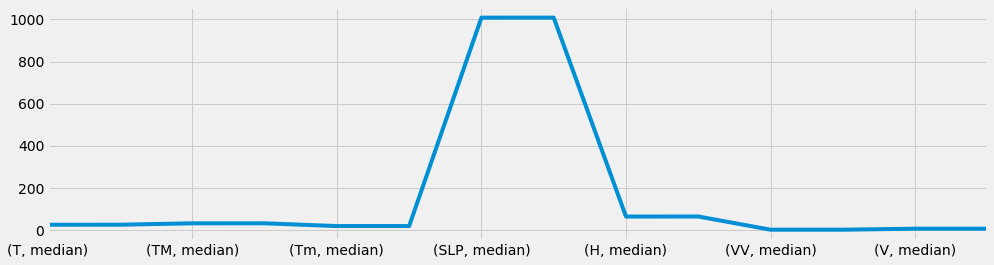

In [19]:
aq.groupby(by=['PM 2.5','VM']).agg(['median','max']).mean().plot(kind='line',figsize=(15,4))

In [20]:
aq['PM 2.5'] =aq['PM 2.5'].astype("float")

{'whiskers': [<matplotlib.lines.Line2D at 0x1e45e15a488>,
 'caps': [<matplotlib.lines.Line2D at 0x1e45f348c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e45e1312c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1e45f34db88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e45f34de48>],
 'means': []}

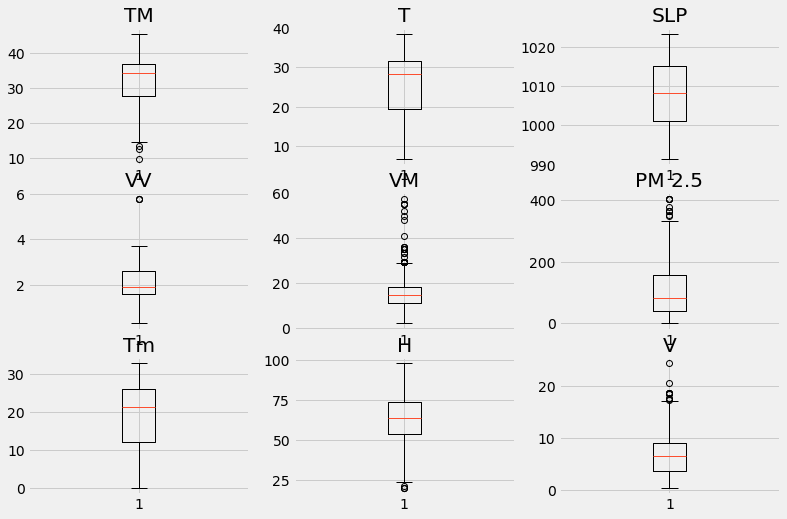

In [21]:
from pylab import rcParams
rcParams["figure.figsize"] = 12,8
import matplotlib.pyplot as plt
fig,axes = plt.subplots(3,3)


axes[0,0].set_title("TM")
axes[0,0].boxplot(aq['TM'])
axes[0,1].set_title("T")
axes[0,1].boxplot(aq['T'])
axes[0,2].set_title("SLP")
axes[0,2].boxplot(aq['SLP'])



axes[1,0].set_title("VV")
axes[1,0].boxplot(aq['VV'])
axes[1,1].set_title("VM")
axes[1,1].boxplot(aq['VM'])
axes[1,2].set_title("PM 2.5")
axes[1,2].boxplot(aq['PM 2.5'])


axes[2,0].set_title("Tm")
axes[2,0].boxplot(aq['Tm'])
axes[2,1].set_title("H")
axes[2,1].boxplot(aq['H'])
axes[2,2].set_title("V")
axes[2,2].boxplot(aq['V'])



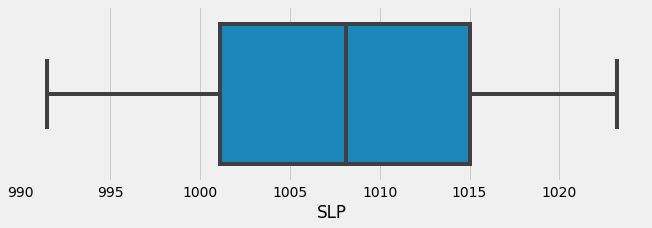

In [22]:
fig_dims = (10, 3)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x=aq['SLP'],data=aq,ax=ax)

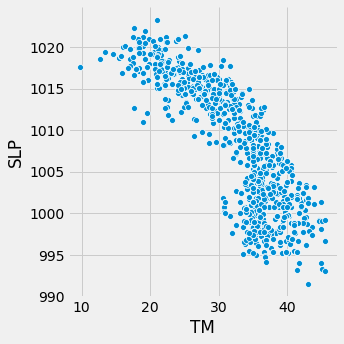

In [23]:
sns.relplot(x="TM",y="SLP",data=aq)

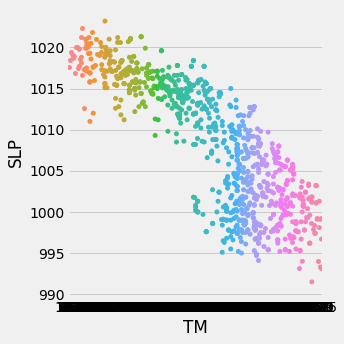

In [24]:
sns.catplot(x="TM",y="SLP",data=aq)

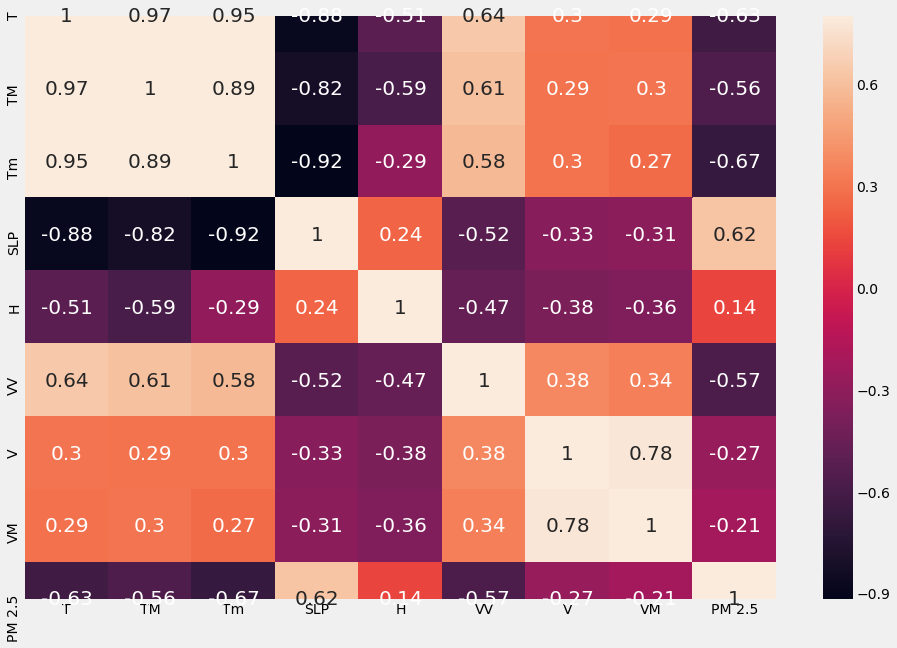

In [25]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(aq.corr(), vmax=.8,annot_kws={'size': 20}, annot=True,ax=ax)

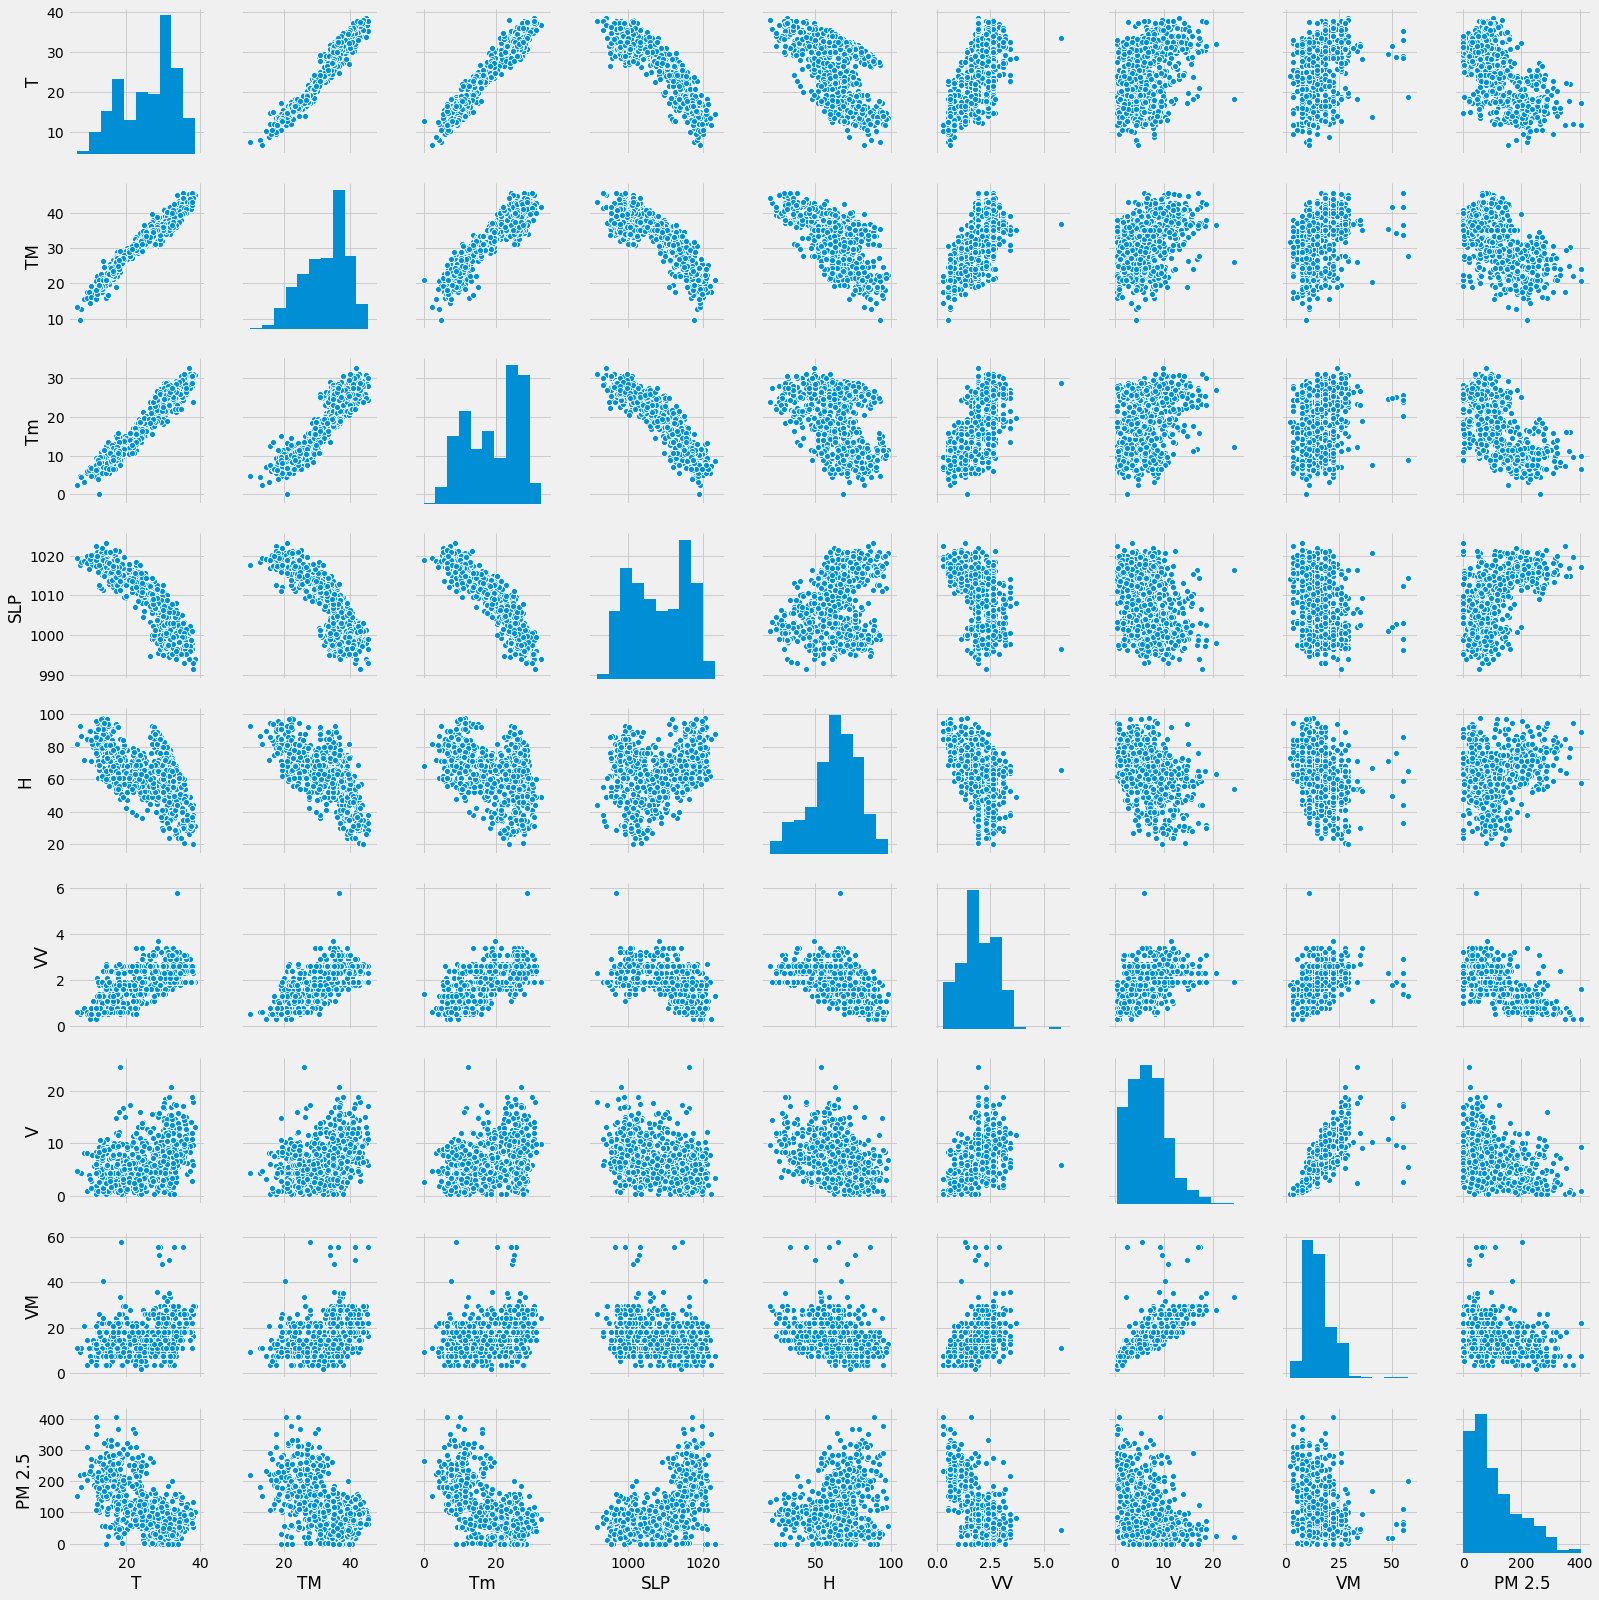

In [26]:
sns.pairplot(aq)

In [27]:
aq.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967570,0.953703,-0.881698,-0.510593,0.640738,0.302349,0.288292,-0.628310
TM,0.967570,1.000000,0.891970,-0.823447,-0.588017,0.606746,0.293309,0.297590,-0.564594
Tm,0.953703,0.891970,1.000000,-0.917557,-0.288647,0.577382,0.296546,0.267249,-0.671540
SLP,-0.881698,-0.823447,-0.917557,1.000000,0.242307,-0.518015,-0.330155,-0.311231,0.619985
H,-0.510593,-0.588017,-0.288647,0.242307,1.000000,-0.465514,-0.380805,-0.362632,0.135584
VV,0.640738,0.606746,0.577382,-0.518015,-0.465514,1.000000,0.377029,0.342650,-0.572789
V,0.302349,0.293309,0.296546,-0.330155,-0.380805,0.377029,1.000000,0.775715,-0.267692
VM,0.288292,0.297590,0.267249,-0.311231,-0.362632,0.342650,0.775715,1.000000,-0.214887
PM 2.5,-0.628310,-0.564594,-0.671540,0.619985,0.135584,-0.572789,-0.267692,-0.214887,1.000000


# Train Test Split

In [28]:
x=aq.iloc[:,:-1] 
y=aq.iloc[:,-1] 

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Decision Tree Model

In [190]:
from sklearn.tree import DecisionTreeRegressor

In [191]:
dtree=DecisionTreeRegressor(criterion="mse")

In [192]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [193]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [194]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(x_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.6474237183247213


In [195]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,x,y,cv=5)

In [196]:
score.mean()

0.46758302069459773

In [197]:
dtreepred = dtree.predict(x_test)
dtreepred

array([ 46.91666667, 107.625     , 332.7083333 , 110.4166667 ,
        37.58333333, 132.2083333 , 212.125     ,  91.75      ,
        43.5       , 284.1666667 ,  87.83333333, 173.5833333 ,
        50.58333333, 118.5       ,  95.25      , 173.5833333 ,
       172.75      , 257.6666667 ,  79.83333333, 161.1666667 ,
         0.        ,  26.66666667,  50.58333333, 128.125     ,
        79.83333333,  30.875     ,  52.45833333,   1.91666667,
         0.        ,  76.54166667,  76.875     , 109.3333333 ,
        79.83333333,  23.20833333,  62.375     ,  30.875     ,
       214.125     , 109.75      ,  23.20833333, 276.9083333 ,
        26.58333333,   0.        , 184.2083333 , 142.5       ,
       403.9583333 , 115.8333333 ,  99.375     ,  77.20833333,
        55.41666667,  93.375     , 276.9083333 ,  64.83333333,
         0.        ,  64.83333333,  29.83333333,  29.83333333,
       179.1166667 , 135.8333333 ,  42.29166667,  30.875     ,
        40.375     , 138.5       ,  36.        , 272.12

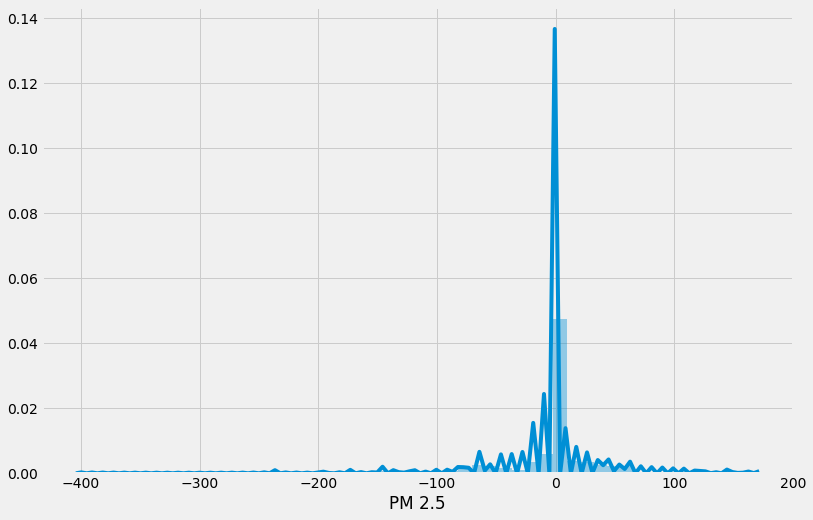

In [198]:
sns.distplot(y_test-dtreepred)

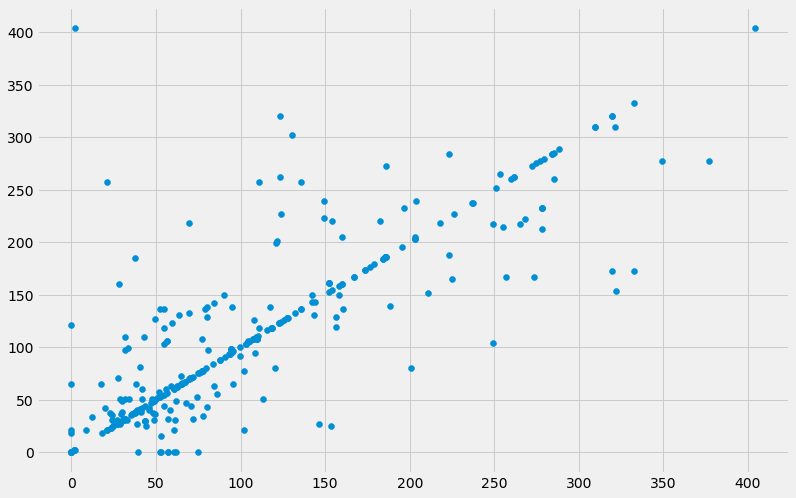

In [199]:
plt.scatter(y_test,dtreepred)

# Grid Search Cross Validation

In [200]:
params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15,20],
 "min_samples_leaf" : [ 1,2,3,4,5,6,7 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

In [45]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [47]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 16128 candidates, totalling 161280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 2153 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 10473 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 22121 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 37097 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 55401 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 77033 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 101993 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 130281 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 161280 out of 161280 | elapsed:  2.6min finished



 Time taken: 0 hours 2 minutes and 35.54 seconds.


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [48]:
random_search.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [49]:
random_search.best_score_

-3170.9417402716786

In [188]:
dtreepredCV=random_search.predict(x_test)
dtreepredCV

array([ 80.4079072 , 222.39620166, 176.85343137,  80.4079072 ,
        53.96519309, 176.85343137, 222.39620166, 122.80069444,
        40.02112676, 222.39620166, 122.80069444,  96.37847222,
        53.96519309,  80.4079072 ,  96.37847222,  96.37847222,
       222.39620166, 176.85343137,  40.02112676, 176.85343137,
        40.02112676,  40.02112676,  53.96519309,  80.4079072 ,
       176.85343137,  80.4079072 ,  40.02112676,  96.37847222,
        40.02112676,  96.37847222,  80.4079072 , 176.85343137,
       176.85343137,  96.37847222,  40.02112676,  80.4079072 ,
       176.85343137,  96.37847222,  96.37847222, 222.39620166,
        40.02112676,  53.96519309, 122.80069444,  80.4079072 ,
       122.80069444,  96.37847222,  53.96519309, 122.80069444,
        80.4079072 , 176.85343137, 222.39620166,  80.4079072 ,
       176.85343137,  80.4079072 ,  40.02112676,  40.02112676,
       176.85343137, 122.80069444,  53.96519309,  40.02112676,
        53.96519309, 122.80069444,  40.02112676, 222.39

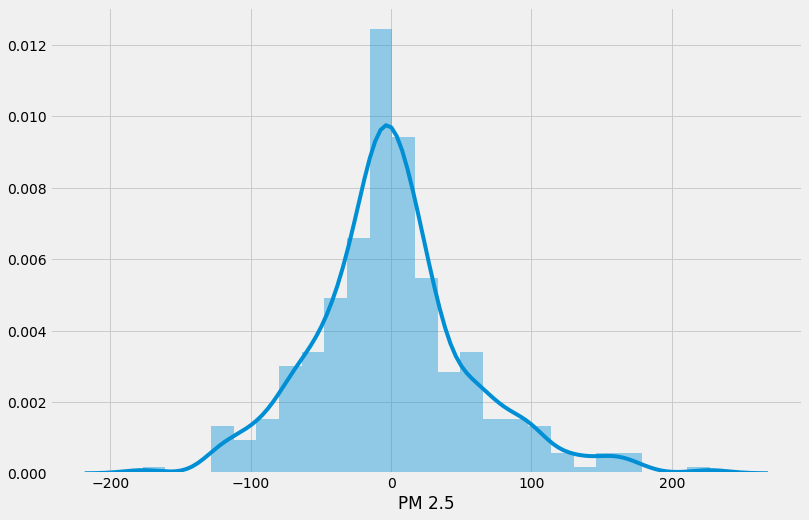

In [51]:
sns.distplot(y_test-dtreepredCV)

In [144]:
from sklearn import metrics
from sklearn.metrics import r2_score
dtreeMAE=(metrics.mean_absolute_error(y_test, dtreepred))
dtreeMSE=(metrics.mean_squared_error(y_test, dtreepred))
dtreeRMSE=np.sqrt(metrics.mean_squared_error(y_test, dtreepred))
dtree=r2_score(y_test, dtreepred)

In [146]:
dtreeCVMAE=(metrics.mean_absolute_error(y_test, dtreepredCV))
dtreeCVMSE=(metrics.mean_squared_error(y_test, dtreepredCV))
dtreeCVRMSE=np.sqrt(metrics.mean_squared_error(y_test, dtreepredCV))
dtreecv=r2_score(y_test, dtreepredCV)

# Random Forest Model

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
regressor=RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [56]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9573170386517749


In [57]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.8217501397554489


In [58]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

In [59]:
score.mean()

0.7079783207730174

In [187]:
prediction=regressor.predict(x_test)
prediction

array([ 40.496998, 154.76715 , 255.60664 ,  77.91973 ,  58.80453 ,
       126.22467 , 215.2472  , 117.02512 ,  49.845665, 233.53368 ,
       106.499725, 102.097374,  50.981636,  71.72654 ,  93.35485 ,
       102.097374, 222.05072 , 205.09761 ,  54.54794 , 168.3912  ,
        46.40404 ,  49.112392,  55.265644,  97.72853 , 150.2952  ,
        37.439747,  49.050785,  43.71124 ,  44.6576  ,  75.91185 ,
        80.62704 , 131.0975  , 192.8916  ,  79.95791 ,  46.903713,
        53.5645  , 247.03807 ,  97.20504 ,  79.95791 , 295.8234  ,
        33.283554,  45.178032, 136.42575 , 118.741806, 143.69319 ,
        96.9579  ,  49.253304,  95.693886,  73.424385, 151.18771 ,
       215.0742  ,  95.58051 ,  88.605606,  89.40479 ,  41.39847 ,
        41.39847 , 156.91936 , 142.6788  ,  47.23874 ,  31.645842,
        51.684685, 118.99789 ,  28.349062, 130.27426 ,  38.64245 ,
       224.11458 , 204.60403 ,  53.49634 ,  44.192654,  53.259308,
        62.500507, 123.52222 ,  88.55096 ,  94.74412 ,  82.943

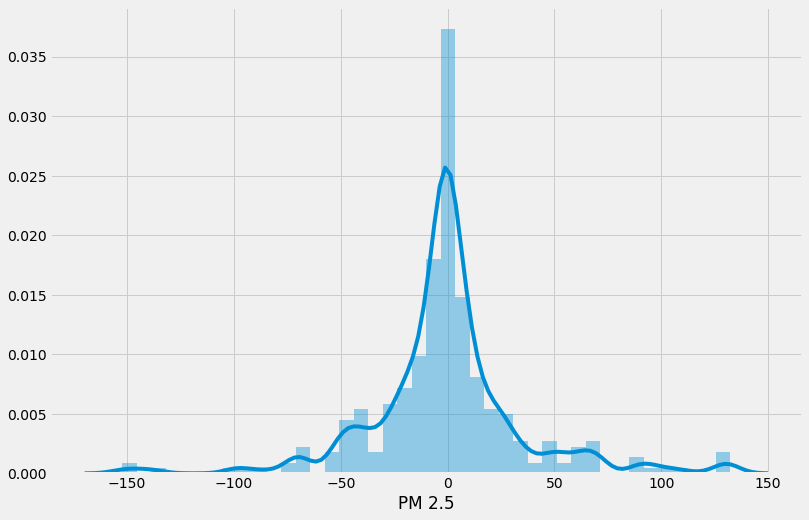

In [61]:
sns.distplot(y_test-prediction)

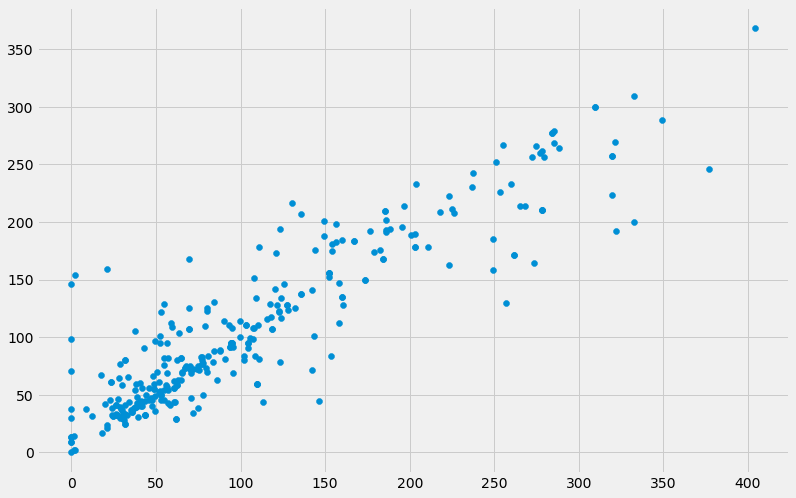

In [62]:
plt.scatter(y_test,prediction)

# Randomized Search Cross Validation

In [63]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [66]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [67]:
yy = pd.DataFrame(y_test)
yz = pd.DataFrame(prediction)
yy = pd.concat([yy,yz],axis=1)
yy = yy.rename({0:'Prediction'},axis=1)
yy = yy.rename({'PM 2.5':'y_test'},axis=1)

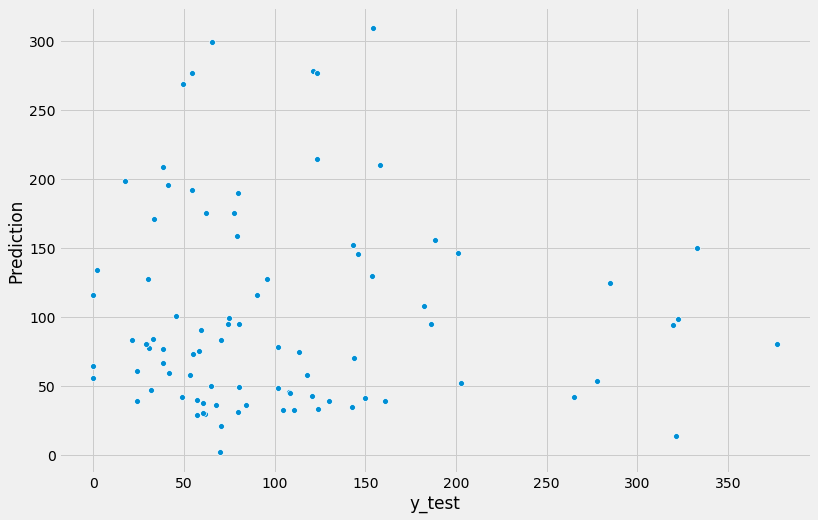

In [68]:
sns.scatterplot(x=yy["y_test"], y=yy['Prediction'], data=yy)

In [69]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [70]:
rf = RandomForestRegressor()

In [71]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [72]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.4s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [73]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [74]:
rf_random.best_score_

-1548.3120712505963

In [186]:
predictionscv=rf_random.predict(x_test)
predictionscv

array([ 46.5265482 , 117.05709357, 306.35170169, 102.56307923,
        63.67523175, 141.0695614 , 231.74081011, 114.34775483,
        45.86674221, 213.5584149 ,  89.63424682, 154.44915693,
        42.61070839,  79.85005952, 102.4475713 , 154.44915693,
       211.02029282, 166.94794344,  74.68768252, 138.1644087 ,
        11.61802235,  37.03885398,  48.60881717, 123.22404299,
       148.34590336,  31.26849853,  51.83832394,  11.24075   ,
        12.02500766,  79.0156017 ,  80.91011111, 117.2356477 ,
       161.92037514,  44.87782591,  53.97044363,  51.56792641,
       203.87793169,  92.55387291,  44.87782591, 261.40494723,
        29.35987754,  38.09277943, 167.54408447, 132.90468233,
       187.21146904, 112.02229268,  58.34147371,  82.75143151,
        66.26451389, 102.35009144, 263.26383157,  80.12841327,
       156.08913662,  86.75150106,  37.20977694,  37.20977694,
       176.99717822, 132.22703073,  45.88402954,  37.41205314,
        49.71684306, 135.45818363,  34.64438432, 232.85

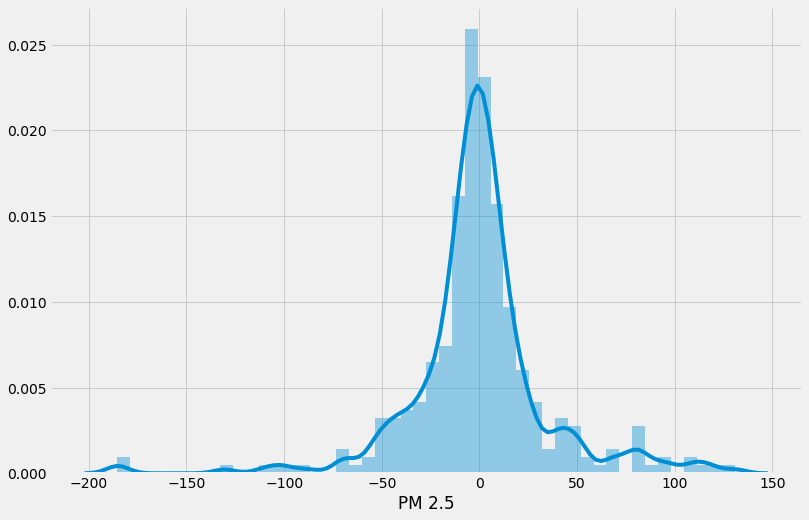

In [76]:
sns.distplot(y_test-predictionscv)

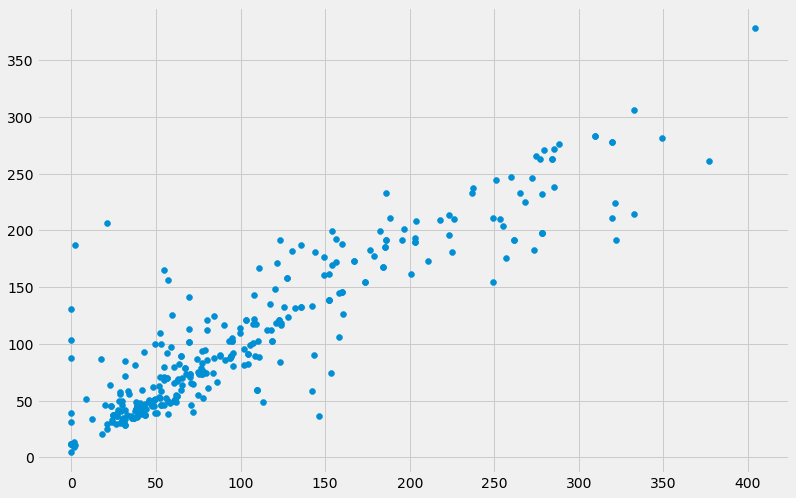

In [77]:
plt.scatter(y_test,predictionscv)

In [78]:
from sklearn  import metrics
from sklearn.metrics import r2_score

In [159]:
rfMAE=(metrics.mean_absolute_error(y_test, prediction))
rfMSE=(metrics.mean_squared_error(y_test, prediction))
rfRMSE=(np.sqrt(metrics.mean_squared_error(y_test, prediction)))
RF=r2_score(y_test, prediction)
rfRMSE

41.49661332591355

In [153]:
rfCV_MAE=(metrics.mean_absolute_error(y_test, predictionscv))
rfCV_MSE=(metrics.mean_squared_error(y_test, predictionscv))
rfCV_RMSE=(np.sqrt(metrics.mean_squared_error(y_test, predictionscv)))
RF_CV=r2_score(y_test, predictionscv)

# XGboost Model

In [177]:
import xgboost as xgb

In [178]:
regressor=xgb.XGBRegressor()
regressor.fit(x_train,y_train)

[10:54:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [179]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.8589096481089039


In [180]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.7622372995372285


In [181]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

[10:54:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:54:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [182]:
score.mean()

0.6640821752709973

In [183]:
predictionXgb=regressor.predict(x_test)
predictionXgb

array([ 40.496998, 154.76715 , 255.60664 ,  77.91973 ,  58.80453 ,
       126.22467 , 215.2472  , 117.02512 ,  49.845665, 233.53368 ,
       106.499725, 102.097374,  50.981636,  71.72654 ,  93.35485 ,
       102.097374, 222.05072 , 205.09761 ,  54.54794 , 168.3912  ,
        46.40404 ,  49.112392,  55.265644,  97.72853 , 150.2952  ,
        37.439747,  49.050785,  43.71124 ,  44.6576  ,  75.91185 ,
        80.62704 , 131.0975  , 192.8916  ,  79.95791 ,  46.903713,
        53.5645  , 247.03807 ,  97.20504 ,  79.95791 , 295.8234  ,
        33.283554,  45.178032, 136.42575 , 118.741806, 143.69319 ,
        96.9579  ,  49.253304,  95.693886,  73.424385, 151.18771 ,
       215.0742  ,  95.58051 ,  88.605606,  89.40479 ,  41.39847 ,
        41.39847 , 156.91936 , 142.6788  ,  47.23874 ,  31.645842,
        51.684685, 118.99789 ,  28.349062, 130.27426 ,  38.64245 ,
       224.11458 , 204.60403 ,  53.49634 ,  44.192654,  53.259308,
        62.500507, 123.52222 ,  88.55096 ,  94.74412 ,  82.943

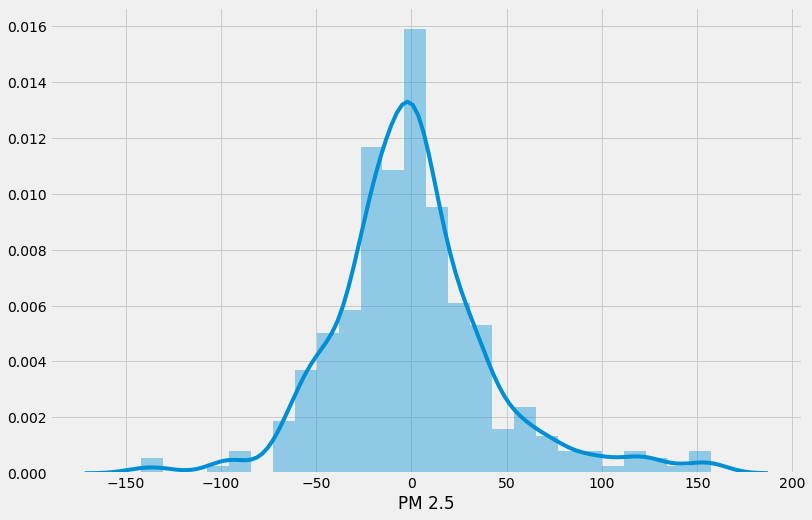

In [184]:
sns.distplot(y_test-predictionXgb)

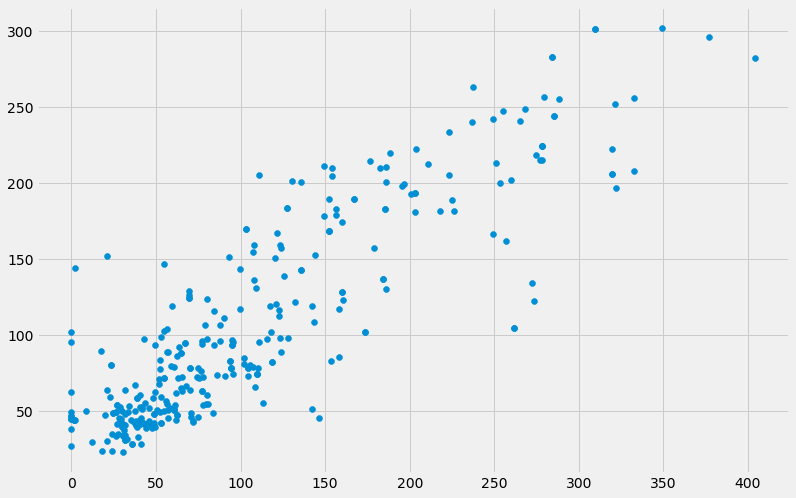

In [185]:
plt.scatter(y_test,predictionXgb)

# Randomized Search Cross Validation

In [95]:
xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [98]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [99]:
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [100]:
regressor=xgb.XGBRegressor()

In [101]:
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [103]:
xg_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[10:11:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[10:11:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[10:11:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[10:11:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[10:11:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/obj

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                             

In [104]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 800,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [106]:
xg_random.best_score_

-1350.6237024957452

In [107]:
rf_random.best_score_

-1548.3120712505963

In [120]:
XbgpredictionCV1=xg_random.predict(x_test)
XbgpredictionCV1

array([ 4.69196739e+01,  1.07628006e+02,  3.32688782e+02,  1.10392754e+02,
        7.35142059e+01,  1.18805847e+02,  2.36594772e+02,  8.31166000e+01,
        4.14923058e+01,  2.08919556e+02,  8.78297424e+01,  1.73625458e+02,
        3.28736687e+01,  7.80882874e+01,  9.52761459e+01,  1.73625458e+02,
        2.10733231e+02,  1.86740189e+02,  7.98494110e+01,  1.11429031e+02,
        1.71286464e-02,  2.66195679e+01,  5.44992485e+01,  1.28107727e+02,
        1.24237953e+02,  3.08727856e+01,  5.24431572e+01,  1.92842209e+00,
        1.22809857e-01,  7.65123215e+01,  7.17854156e+01,  1.09307739e+02,
        1.69843353e+02,  2.34260902e+01,  6.21220360e+01,  2.85633221e+01,
        2.48360931e+02,  9.57063065e+01,  2.34260902e+01,  2.43407883e+02,
        2.65719910e+01,  3.67893181e+01,  1.84122940e+02,  1.42513885e+02,
        1.56223404e+02,  1.15848518e+02,  7.25375366e+01,  7.72295532e+01,
        4.93552094e+01,  9.33680725e+01,  2.76907501e+02,  7.05726166e+01,
        8.56298141e+01,  

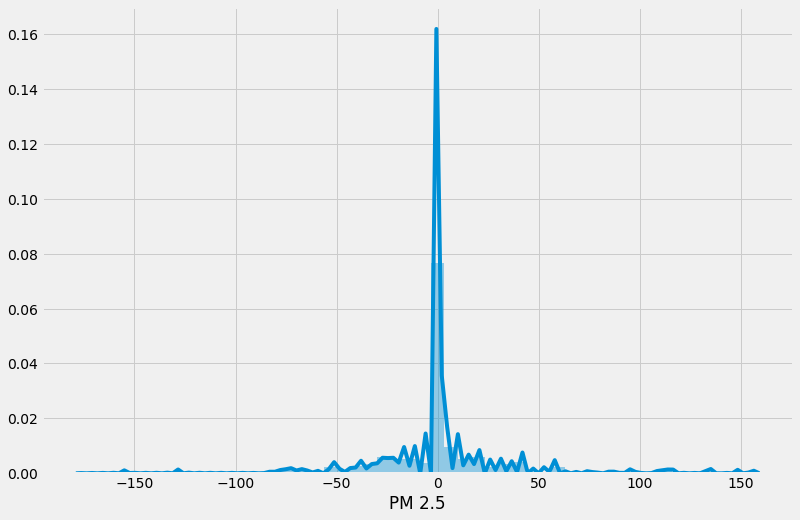

In [121]:
sns.distplot(y_test-XbgpredictionCV1)

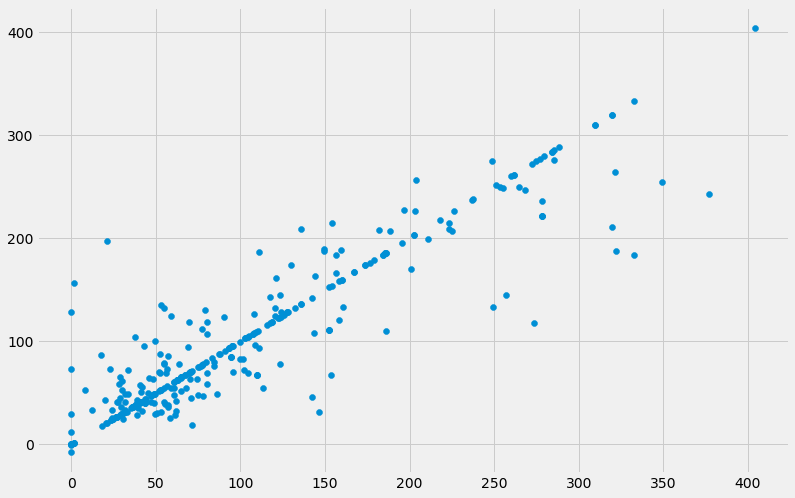

In [122]:
plt.scatter(y_test,XbgpredictionCV1)

In [156]:
from sklearn import metrics
from sklearn.metrics import r2_score
XGb_MAE=(metrics.mean_absolute_error(y_test, predictionXgb))
XGb_MSE=(metrics.mean_squared_error(y_test, predictionXgb))
XGb_RMSE=(np.sqrt(metrics.mean_squared_error(y_test, predictionXgb)))
Xgb=r2_score(y_test,predictionXgb)

In [157]:
xgbCV_MAE=(metrics.mean_absolute_error(y_test, XbgpredictionCV1))
xgbCV_MSE=(metrics.mean_squared_error(y_test, XbgpredictionCV1))
xgbCV_RMSE=(np.sqrt(metrics.mean_squared_error(y_test, XbgpredictionCV1)))
XGb_CV=r2_score(y_test,XbgpredictionCV1)

# Best Model

In [167]:
Best_Model ={'Model':['Desicion Tree','Cross_Validated_DTree', 'Random Forest','Cross_Validated_RF', 'XGboost','Cross_Validated_Xgb'],
        'R2_Score':[dtree,dtreecv,RF,RF_CV,Xgb,XGb_CV],'RMSE':[dtreeRMSE,dtreeCVRMSE,rfRMSE,rfCV_RMSE,XGb_RMSE,xgbCV_RMSE],'MSE':[dtreeMSE,dtreeCVMSE,rfMSE,rfCV_MSE,XGb_MSE,XGb_MSE],'MAE':[dtreeMAE,dtreeCVMAE,rfMAE,rfCV_MAE,XGb_MAE,XGb_MAE]}
Best_Model =pd.DataFrame(Best_Model)
Best_Model=Best_Model.set_index('Model')
Best_Model

,R2_Score,RMSE,MSE,MAE
Model,,,,
Desicion Tree,0.648079,50.485125,2548.747819,24.255094
Cross_Validated_DTree,0.569868,55.813792,3115.179380,40.505720
Random Forest,0.762237,41.496613,1721.968918,29.188837
Cross_Validated_RF,0.819211,36.184870,1309.344807,22.567863
XGboost,0.762237,41.496613,1721.968918,29.188837
Cross_Validated_Xgb,0.836624,34.398088,1721.968918,29.188837
